# ***A Week in the Life of Twitch: Analyzing Streamer, Game, and Viewer Dynamics***

## By ***Nicolas Michael Feliz***

GitHub Repository: [https://github.com/MichaelNich/twitch-data-analysis](https://github.com/MichaelNich/twitch-data-analysis)

# **Outline**:
+ Disclaimer
+ Methodology
+ Twitch Data Analysis

    + *Libraries and datasets import*

    
    + Which games have the highest average viewership throughout the entire week?
    + Are there differences between the audience on weekdays and weekends?
    + Which games have the highest mean views over the day?
    + Which Genres are more popular?
    + Which Game's Genres appear more?
    + Which streamers have the highest average numbers of viewers and what do they play?
    + Who are the 10 female streamers with the most average viewers and what do they play?
    + What is the gender proportion of the streamers?
    + What is the Distribution of streamer's mean viewers by gender?
    + Does longer time streaming result in more average viewers?
    + Do Viewership Patterns Differ Across Genders on Different Days of the Week?
    + What is the Game Distribution Among Male and Female Streamers?
    + What is the Genre distribution by Gender?
    + What is the language distribution?
    + The most popular games for each language:
    + The most popular genres for each language:
    + What is the female proportion to male by each language?
    + **Overall Findings**

# **Disclaimer:**

## Data Collection:

* Data was collected from Twitch.tv between July 24, 2024, 00:00 (UTC-5), and July 30, 2024, 23:59 (UTC-5)
* The dataset includes streamers broadcasting in the following languages: Spanish, Chinese, Portuguese, English, French, Italian, Korean, Japanese, Polish, German, Turkish, Russian, and Ukrainian.
* Data was gathered at 15-minute intervals to adhere to Twitch API guidelines and prevent rate-limiting errors.


## Limitations:

* The dataset reflects a limited time frame and specific languages, potentially impactinggeneralizability of findings.
* Data collection frequency (15 minutes) may not capture all streaming events or fluctuations.
* Data accuracy relies on the reliability of the Twitch API at the time of collection.


## Purpose and Ethical Considerations:


* This dataset is intended solely for a personal, non-profit data analysis project.
* No commercial use or monetary gain is associated with this data.
* No intention to disparage or diminish any streamer or language community is implied through this analysis.
* Data handling and analysis will prioritize ethical considerations and respect for individual streamers.

## Additional Notes:


* Twitch Terms of Service and API guidelines are observed for responsible data usage.
* Any conclusions drawn from this analysis reflect observations within the dataset's scope and limitations.
* Further research or data collection may be necessary to validate findings or expand scope.

# **Methodology:**
## Overview
The primary objective of this data analysis project is to gain insights into Twitch streaming trends, focusing on streamers, games, and viewer behavior. The methodology encompasses a data pipeline that involves web scraping, data transformation, and database storage.

## Data Collection
Web Scraping
Web scraping is employed to extract relevant data from the Twitch website. Utilizing the Selenium and BeautifulSoup libraries in Python, the script navigates the Twitch directory, collecting information on streamers, games, and viewer statistics.

* Streamers Data:
For streamers, the script accesses the directory filtered by language, capturing streamer names, viewer counts, content categories, and language information.

* Games Data:
The script also retrieves data on popular games by accessing the Twitch directory sorted by viewer count. Game names, viewer statistics, and associated categories are collected.

## Data Transformation and Cleaning
Once the raw data is obtained, a series of data transformation and cleaning steps are implemented to structure and organize the information for analysis.

## Streamers Data
The collected streamer data, including viewer counts, names, categories, and language, is processed to remove any inconsistencies or undesirable characters. The resulting cleaned data is then stored in a relational database.

## Games Data
Similar data cleaning steps are applied to the games data, ensuring consistency in game names, viewer statistics, and associated categories. Cleaned game data is also stored in the database.

## Data Storage
IBM Db2 is utilized as the database management system to store the cleaned data. The data is organized into tables, including 'STREAMERS', 'GAMES', and 'CATEGORIES', facilitating efficient querying and analysis.

## Error Handling and Backup
To ensure data integrity and fault tolerance, the project incorporates error handling mechanisms. In cases where data insertion fails, the script logs the errors and saves the failed rows to backup files ('streamers.txt' and 'games.txt'). These backup files are later processed to re-insert the failed data into the database.

## Execution
The project is designed to run periodically, fetching fresh data every 15 minutes until a specified target date is reached. This periodic execution ensures that the analysis is based on up-to-date information.

## Conclusion
By following this methodology, the data analyst aims to uncover patterns, trends, and insights within the Twitch streaming ecosystem. The structured approach to data collection, transformation, and storage sets the foundation for robust analysis, providing a comprehensive understanding of the Twitch platform and its user dynamics.

# **Twitch Data Analysis**

# Libraries and datasets import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.graph_objects as go # responsible for creating the tables for most popular games and genres
import matplotlib.ticker as mtick # responsible for tick formatting percentage
from data_cleaning.data_transformations_functions import transform_to_numeric, create_bar_graph # as there are many bar graphs, this function is to avoid repeating code when creating bar

## Load the csv files

In [2]:
categories_path = r'data_collection/data/categories.csv'
games_path = r'data_collection/data/games.csv'
streamers_path = r'data_collection/data/streamers.csv'

categories = pd.read_csv(categories_path)
games = pd.read_csv(games_path)
streamers = pd.read_csv(streamers_path)

## Check the csv files

In [3]:
categories.info(),
categories.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   GAME_NAME  439 non-null    object
 1   CATEGORY   439 non-null    object
dtypes: object(2)
memory usage: 7.0+ KB


,GAME_NAME,CATEGORY
0,60 Seconds!,Simulation
1,60 Seconds!,Strategy
2,ARK: Survival Evolved,Adventure Game
3,ARK: Survival Evolved,Arcade
4,ARK: Survival Evolved,Card & Board Game


In [4]:
games.info(),
games.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20661 entries, 0 to 20660
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      20661 non-null  int64 
 1   NAME    20661 non-null  object
 2   VIEWS   20661 non-null  object
 3   DATE    20661 non-null  object
dtypes: int64(1), object(3)
memory usage: 645.8+ KB


,ID,NAME,VIEWS,DATE
0,1,Só na conversa,492.4 mil espectadores,2023-07-22 13:45:00.0
1,2,Grand Theft Auto V,334.1 mil espectadores,2023-07-22 13:45:00.0
2,3,Esportes,317.9 mil espectadores,2023-07-22 13:45:00.0
3,4,League of Legends,282.2 mil espectadores,2023-07-22 13:45:00.0
4,5,Counter-Strike: Global Offensive,234.3 mil espectadores,2023-07-22 13:45:00.0


In [5]:
streamers.info(),
streamers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268042 entries, 0 to 268041
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              268042 non-null  int64 
 1   STREAMER_NAMES  268042 non-null  object
 2   STREAMER_VIEWS  268042 non-null  object
 3   CATEGORY_NAMES  268042 non-null  object
 4   LANG            268042 non-null  object
 5   DATE            268042 non-null  object
dtypes: int64(1), object(5)
memory usage: 12.3+ MB


,ID,STREAMER_NAMES,STREAMER_VIEWS,CATEGORY_NAMES,LANG,DATE
0,1,MayoguiPlay,99 espectadores,Im Only Sleeping,Español,2023-07-21 10:59:00.0
1,2,凱旋路惡少 (lhzzzzzttv),13 espectadores,Conquerors Blade,中文,2023-07-21 11:01:00.0
2,3,biscoito,172 espectadores,Minecraft,Español,2023-07-21 07:00:00.0
3,4,ovotz,318 espectadores,Virtual Casino,Español,2023-07-21 07:00:00.0
4,5,sabrinoca,662 espectadores,League of Legends,Español,2023-07-21 07:00:00.0


## Working with games.csv

In [6]:
games = pd.read_csv(games_path)
filter_date = pd.Timestamp('2023-07-23 23:59:59')
games['DATE'] = pd.to_datetime(games['DATE'])
games = games[games['DATE'] > filter_date]
games['VIEWS'] = games['VIEWS'].apply(transform_to_numeric)

# Which games have the highest average viewership throughout the entire week?

### Filter the data and plot the graph

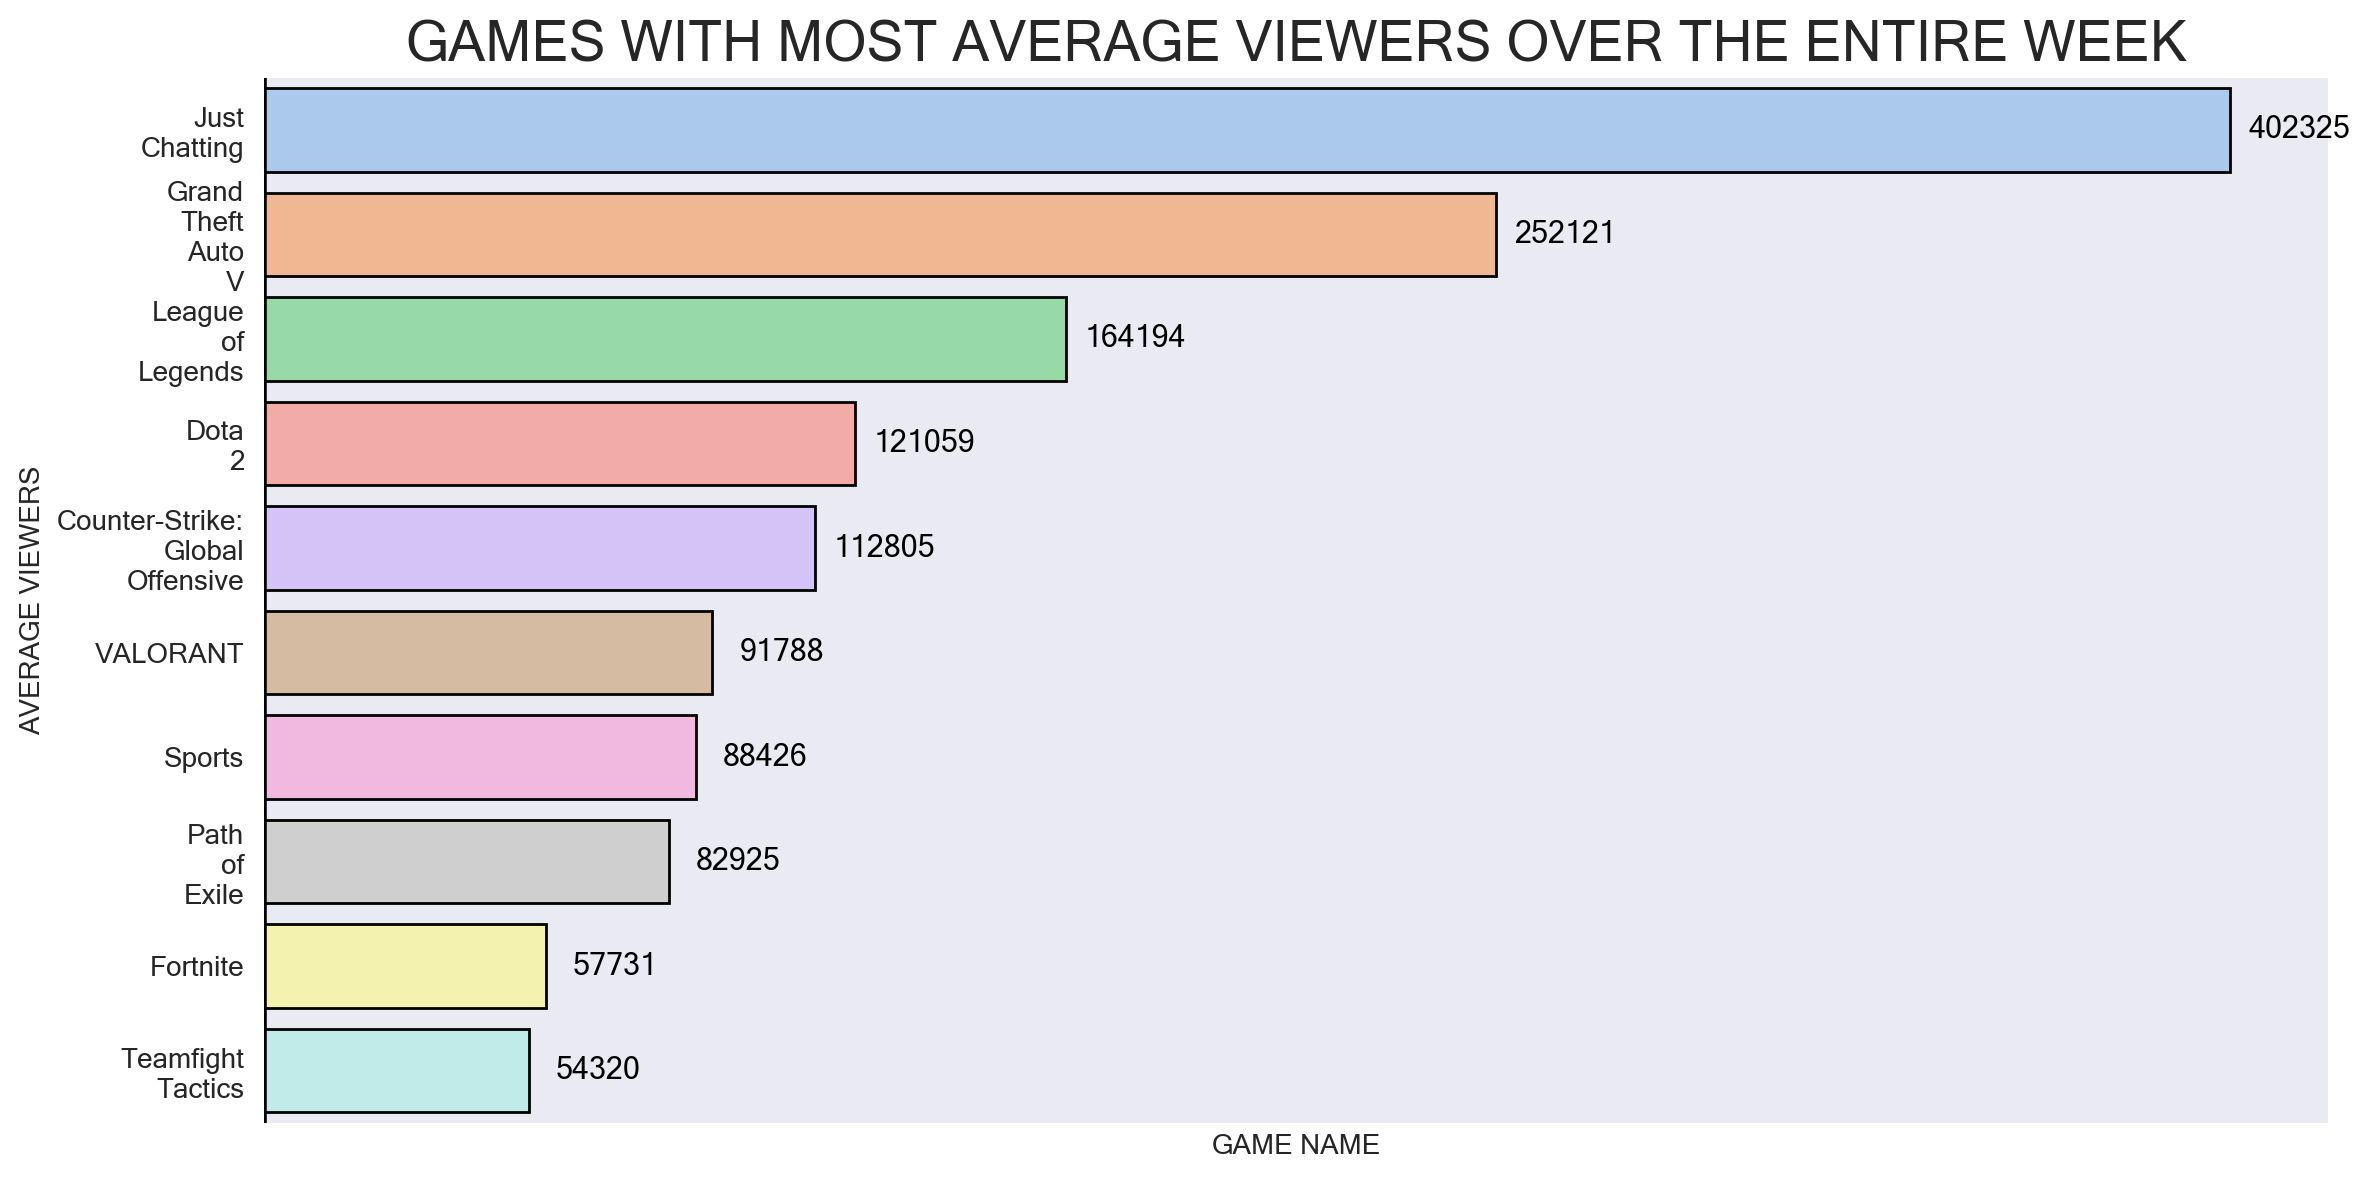

In [7]:
filter_date_weekdays = pd.Timestamp('2023-07-28 23:59:59')

mean_views_series = games.groupby('NAME')['VIEWS'].mean()
mean_views_df = mean_views_series.reset_index()
mean_views_df.columns = ['name', 'mean_views']

# FILTER ONLY CATEGORIES THAT APPEAR MORE THAN 15 TIMES IN THE DATAFRAME
name_count = games['NAME'].value_counts()

filter_only_15_more = games[games['NAME'].isin(name_count[name_count > 15].index)]
mean_views_filtered = filter_only_15_more.groupby('NAME')['VIEWS'].mean()
mean_views_filtered = mean_views_filtered.reset_index()
mean_views_filtered.columns = ['name', 'mean_views']

mean_views_filtered.sort_values(by='mean_views', ascending=False).head(10)
top_10_mean_views_week = mean_views_filtered.sort_values(by='mean_views', ascending=False).head(10)
reversed_purples = sns.color_palette("Purples", n_colors=10)[::-1]

# options var is a dictionary that contains all the options for the bar graph, so that it can be easily changed
options = {'xlabel': 'GAME NAME',
           'ylabel': 'AVERAGE VIEWERS',
           'title': 'GAMES WITH MOST AVERAGE VIEWERS OVER THE ENTIRE WEEK',
           'font_family': 'sans-serif',
           'format_long_names': True,
           'font': 'Microsoft Sans Serif',
           'x': 'mean_views',
           'y': 'name',
           'hue': None,
           'dodge': None,
           'legend_title': '',
           'legend_font_size': 10,
           'palette': 'pastel'}

sns.set_style('dark')

create_bar_graph(top_10_mean_views_week, options=options)

### Answer:
Just Chatting, despite not being a traditional game, dominates Twitch with 59% more average viewers than the second-ranked GTA V. League of Legends follows in third place, outpacing its rival Dota 2 by 35%. Notably, Counter-Strike: Global Offensive (CS:GO) surpasses Valorant in the rankings, showcasing its enduring popularity despite Valorant's newer entry to the gaming scene.

# Are there differences between the audience on weekdays and weekends?

### GET weekdays data from monday to friday where the categories appears more than 15 times

In [8]:
filter_date_weekdays = pd.Timestamp('2023-07-29 00:00:00')

games_week_days = games[games['DATE'] < filter_date_weekdays]

# FILTER ONLY CATEGORIES THAT APPEAR MORE THAN 15 TIMES
filter_only_10_more = games_week_days[games_week_days['NAME'].isin(name_count[name_count > 15].index)]

mean_views_filtered = filter_only_10_more.groupby('NAME')['VIEWS'].mean()
mean_views_filtered = mean_views_filtered.reset_index()
mean_views_filtered.columns = ['name', 'mean_views']

mean_views_filtered.sort_values(by='mean_views', ascending=False).head(10)
top_10_mean_views_weekdays = mean_views_filtered.sort_values(by='mean_views', ascending=False)

### GET weekends data from saturday and sunday where the categories appears more than 15 times

In [9]:
filter_date_weekends = pd.Timestamp('2023-07-28 23:59:59')

games_weekends = games[games['DATE'] > filter_date_weekends]

# FILTER ONLY CATEGORIES THAT APPEAR MORE THAN 10 TIMES
#name_count = games['NAME'].value_counts()
filter_only_10_more_weekends = games_weekends[games_weekends['NAME'].isin(name_count[name_count > 15].index)]

mean_views_filtered = filter_only_10_more_weekends.groupby('NAME')['VIEWS'].mean()
mean_views_filtered = mean_views_filtered.reset_index()
mean_views_filtered.columns = ['name', 'mean_views']

mean_views_filtered.sort_values(by='mean_views', ascending=False).head(10)
top_10_mean_views_weekends = mean_views_filtered.sort_values(by='mean_views', ascending=False)

### Merge the 2 dataframes weekends and weekdays

In [10]:
top10 = list(top_10_mean_views_week.head(10)['name'])
top_10_weekends = top_10_mean_views_weekends[top_10_mean_views_weekends['name'].isin(top10)].head(10)
top_10_weekdays = top_10_mean_views_weekdays[top_10_mean_views_weekdays['name'].isin(top10)].head(10)

dataframes_dict = {
    'weekdays': top_10_weekdays.set_index('name'),
    'weekends': top_10_weekends.set_index('name')
}

# Concatenate the DataFrames and use MultiIndex for columns
df = pd.concat(dataframes_dict, axis=1, keys=dataframes_dict.keys(), names=['Data', 'Name'])

weekdays = df['weekdays'].reset_index()
weekends = df['weekends'].reset_index()
sns.set_style('whitegrid')
# Merge the dataframes into a single one with MultiIndex columns
merged_df = pd.merge(weekdays, weekends, on='name')

# Rename the columns
merged_df.columns = ['name', 'mean_views_weekdays', 'mean_views_weekends']

# Calculate the percentage difference between 'weekdays' and 'weekends'
merged_df['percentage_difference'] = ((merged_df['mean_views_weekends'] - merged_df['mean_views_weekdays']) /
                                       merged_df['mean_views_weekdays']) * 100

merged_df['name'] = merged_df['name'].apply(lambda name: name.replace(" ", "\n"))

### Plot the graph

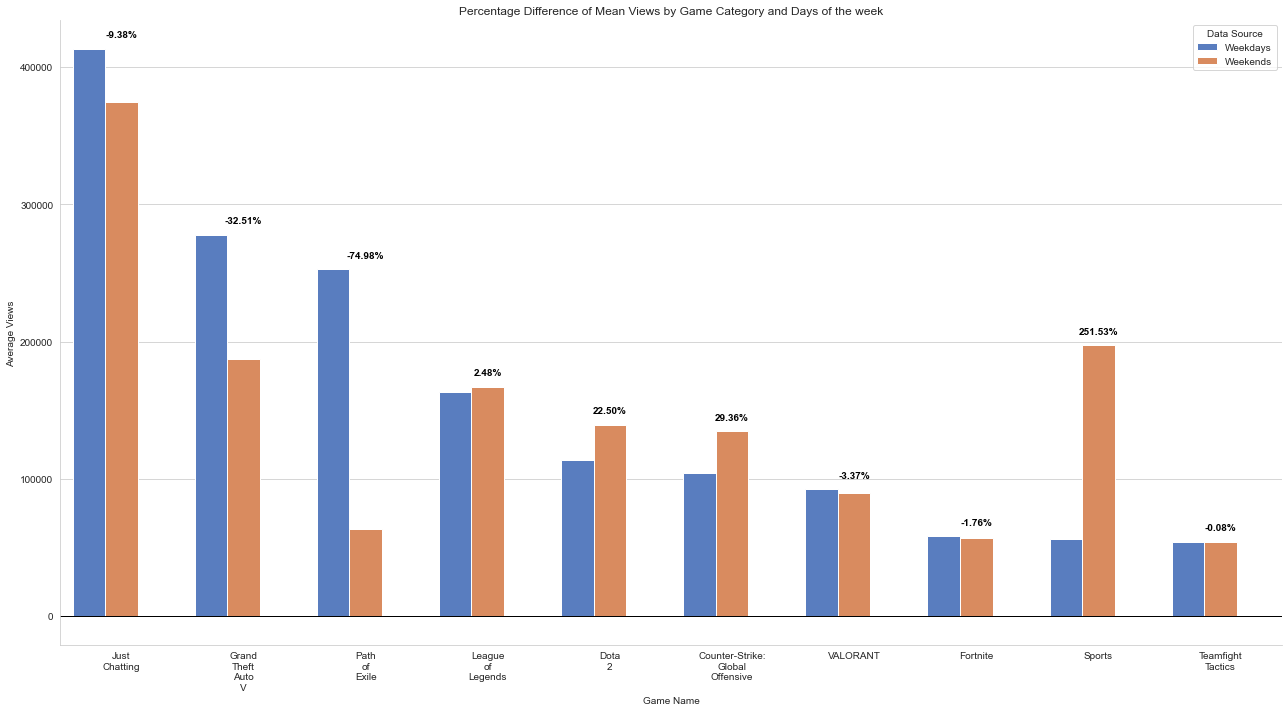

In [11]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=merged_df.melt(id_vars='name', var_name='Data', value_name='mean_views'),
            x='name', y='mean_views', hue='Data', palette='muted')

# Calculate the maximum value for each category
max_values = merged_df[['mean_views_weekdays', 'mean_views_weekends']].max(axis=1)

# Add text labels for the percentage difference a bit higher on top of the highest column
for i, row in merged_df.iterrows():
    plt.text(i, max_values[i] + 10000, f'{row["percentage_difference"]:.2f}%', 
             ha='center', va='center', fontsize=10, color='black', fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.axhline(y=0, color='black', linewidth=1)

# Customize the plot
plt.xlabel('Game Name')
plt.ylabel('Average Views')
plt.title('Percentage Difference of Mean Views by Game Category and Days of the week')

# Customize the legend labels and remove the 'percentage difference' legend
handles, labels = ax.get_legend_handles_labels()
labels = ['Weekdays', 'Weekends']
ax.legend(handles=handles[:2], labels=labels, title='Data Source')

# Display the plot
plt.tight_layout()
plt.show()

### Answer:
Overall, there doesn't appear to be a significant difference in average viewership between weekdays and weekends for most games. However, noteworthy exceptions include:

Sports: Exhibits a substantial increase of 251% in average viewership on weekends. This trend aligns with the higher occurrence of sports events during weekends, attracting a larger viewership.

Path of Exile: Demonstrates a 75% surge in average viewers on weekdays. This can be attributed to a strategic event, such as the launch of a new DLC and a drop event specifically for Twitch viewers during the analyzed weekend. These factors contributed to a boost in the average viewership for Path of Exile.


# Which games have the highest mean views over the day?

### Get the data of each time of the day and their respective mean views

In [12]:
games_morning = games[(games['DATE'].dt.hour >= 6) & (games['DATE'].dt.hour < 12)]
games_morning_top10 = games_morning[games_morning['NAME'].isin(top10)]
games_morning_top10 = games_morning_top10.groupby('NAME')['VIEWS'].mean().reset_index().sort_values(by='VIEWS', ascending=False).head(10)
games_morning_top10['time_of_day'] = 'morning'

games_afternoon = games[(games['DATE'].dt.hour >= 12) & (games['DATE'].dt.hour < 18)]
games_afternoon_top10 = games_afternoon[games_afternoon['NAME'].isin(top10)]
games_afternoon_top10 = games_afternoon_top10.groupby('NAME')['VIEWS'].mean().reset_index().sort_values(by='VIEWS', ascending=False).head(10)
games_afternoon_top10['time_of_day'] = 'afternoon'

games_night = games[(games['DATE'].dt.hour >= 18) & (games['DATE'].dt.hour < 24)]
games_night_top10 = games_night[games_night['NAME'].isin(top10)]
games_night_top10 = games_night_top10.groupby('NAME')['VIEWS'].mean().reset_index().sort_values(by='VIEWS', ascending=False).head(10)
games_night_top10['time_of_day'] = 'night'

games_dawn = games[(games['DATE'].dt.hour >= 0) & (games['DATE'].dt.hour < 6)]
games_dawn_top10 = games_dawn[games_dawn['NAME'].isin(top10)]
games_dawn_top10 = games_dawn_top10.groupby('NAME')['VIEWS'].mean().reset_index().sort_values(by='VIEWS', ascending=False).head(10)
games_dawn_top10['time_of_day'] = 'dawn'

### Plot the data

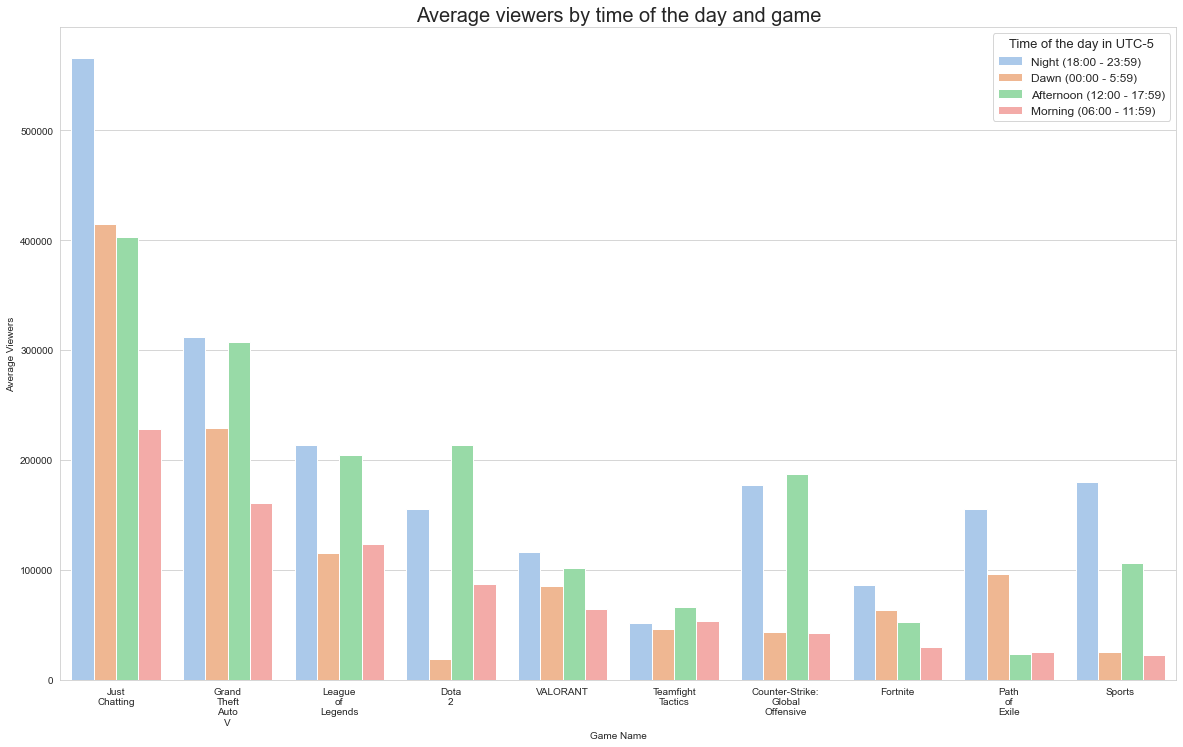

In [13]:
combined_df = pd.concat([games_morning_top10, games_afternoon_top10, games_night_top10, games_dawn_top10], ignore_index=True)
plt.figure(figsize=(12, 8))
desired_order = ['night', 'dawn', 'afternoon', 'morning']
combined_df.loc[:, 'NAME'] = combined_df['NAME'].apply(lambda name: name.replace(" ", "\n"))
ax = sns.barplot(data=combined_df, x='NAME', y='VIEWS', hue='time_of_day', palette='pastel', hue_order=desired_order)
legend = plt.legend(title='Time of the day in UTC-5', fontsize=12, title_fontsize=13)

plt.title('Average viewers by time of the day and game', fontsize=20)
plt.xlabel('Game Name')
plt.ylabel('Average Viewers')

# Set the legend labels to your desired texts
new_labels = ['Night (18:00 - 23:59)', 'Dawn (00:00 - 5:59)', 'Afternoon (12:00 - 17:59)', 'Morning (06:00 - 11:59)']  # Replace with your desired legend labels
for text, label in zip(legend.get_texts(), new_labels):
    text.set_text(label)

### Answer:
"Just Chatting consistently maintains its dominance throughout all hours of the day, based on data gathered at UTC-5. Interestingly, the graphs for almost all games exhibit similar shapes, suggesting a shared trend in viewership patterns. Notably, the late-night and dawn periods (at UTC-5) emerge as peak hours with consistently higher global audience numbers across various games."

# Which Genres are more popular?

### Merge categories with games on 'NAME' and 'GAME_NAME' and drop the extra game_name column

In [14]:
games_categories = games.merge(categories, left_on='NAME', right_on='GAME_NAME')
games_categories = games_categories.drop(columns=['GAME_NAME'])

### Get the mean views of the new dataframe games_categories

In [15]:
games_categories2 = games_categories.groupby('CATEGORY')['VIEWS'].mean().reset_index().sort_values(by='VIEWS', ascending=False)

### Plot the graph

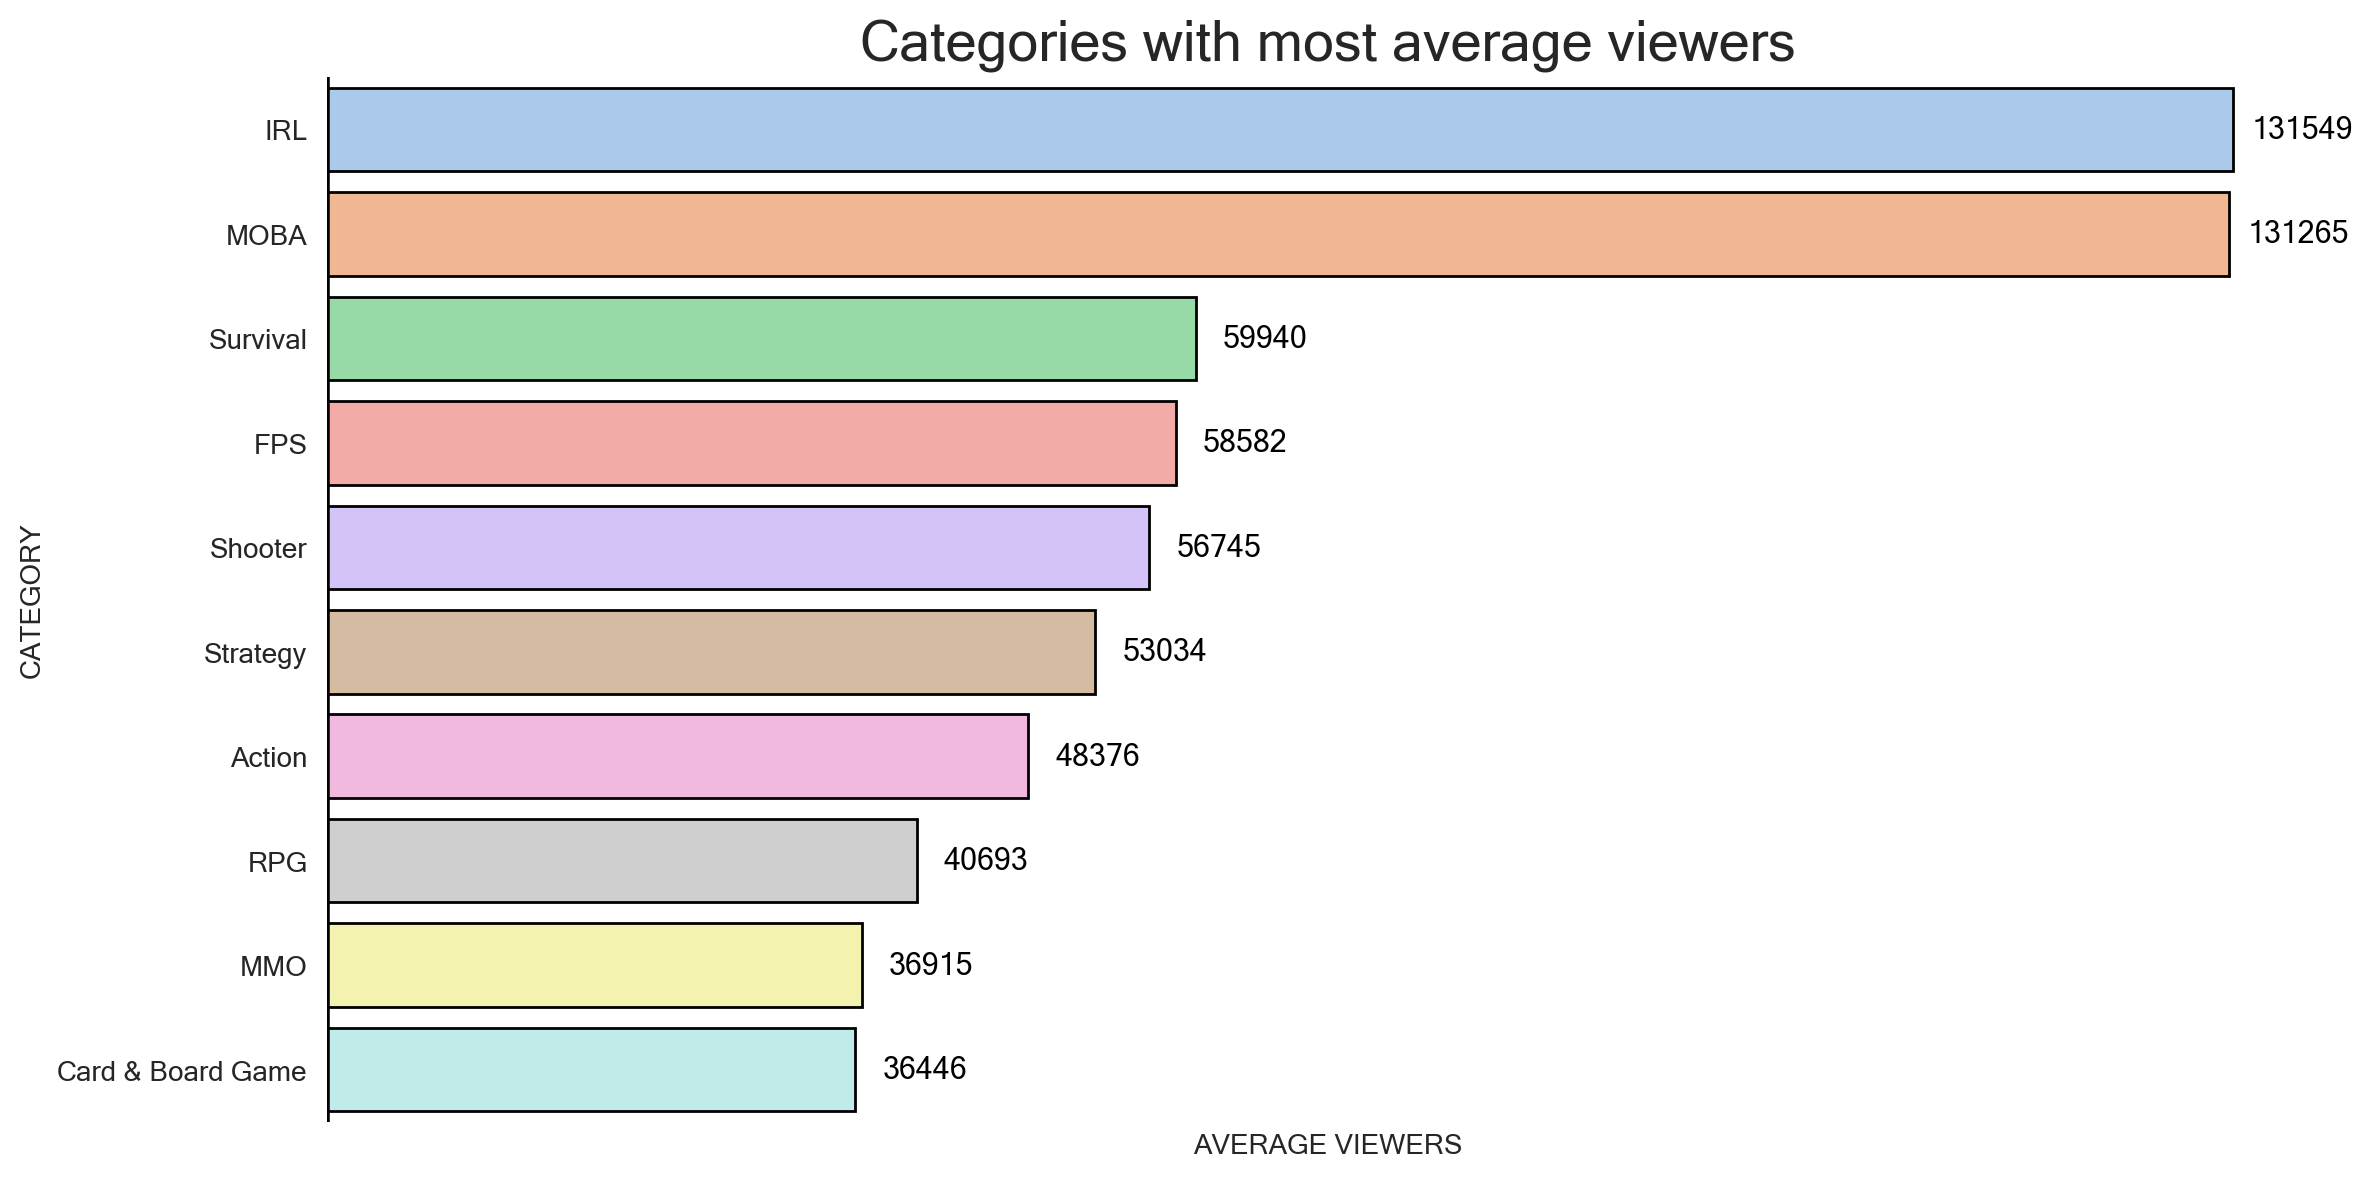

In [16]:
options = {'xlabel': 'AVERAGE VIEWERS',
           'ylabel': 'CATEGORY',
           'title': 'Categories with most average viewers',
           'format_long_names': False,
           'font_family': 'sans-serif',
           'font': 'Microsoft Sans Serif',
           'x': 'VIEWS',
           'y': 'CATEGORY',
           'hue': None,
           'dodge': None,
           'legend_title': '',
           'legend_font_size': 10,
           'palette': 'pastel'}
from data_cleaning.data_transformations_functions import create_bar_graph
create_bar_graph(games_categories2.head(10), options=options)

### Answer:
IRL, which includes Just Chatting, claims the top spot by a narrow margin, boasting an average viewership of 131549. It narrowly surpasses MOBA (e.g., LoL and Dota 2) with 131265 views. Notably, IRL has at least 119% more average viewers than the remaining genres. Despite popular games like CSGO and Valorant, FPS secures the fourth position in the rankings.

# Which Game's Genres appear more?

### Plot the count of the categories

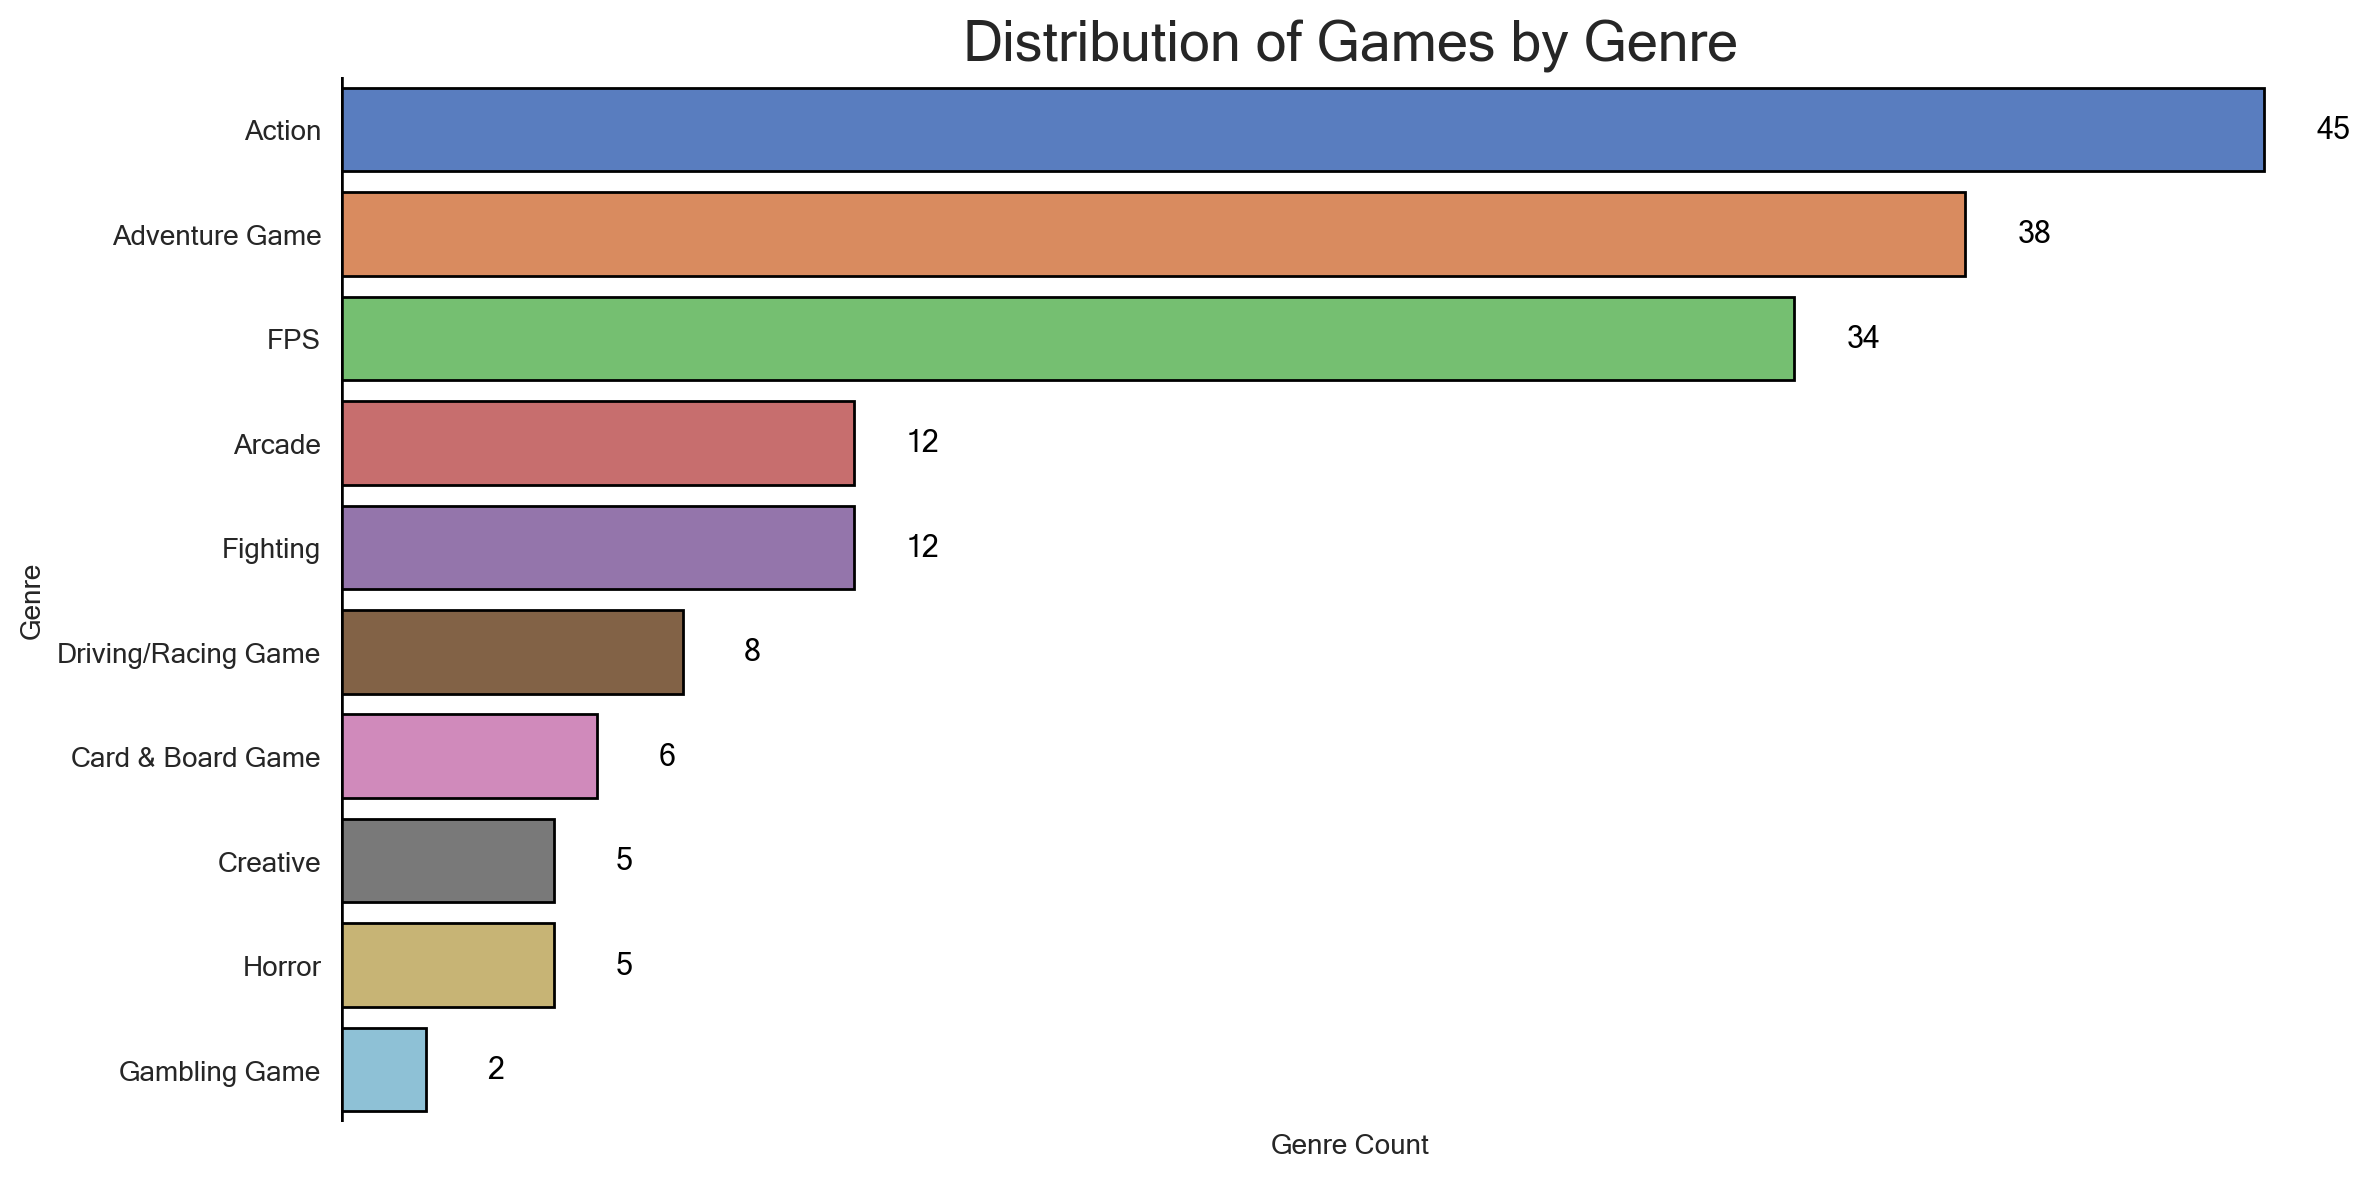

In [17]:
# Group by 'CATEGORY' and count unique 'NAME' values in each group
category_counts = games_categories.groupby('CATEGORY')['NAME'].nunique().reset_index()

# Rename the columns for clarity
category_counts.columns = ['name', 'Unique_Count']
options = {'xlabel': 'Genre Count',
           'ylabel': 'Genre',
           'title': 'Distribution of Games by Genre',
           'format_long_names': False,
           'font_family': 'sans-serif',
           'font': 'Microsoft Sans Serif',
           'x': 'Unique_Count',
           'y': 'name',
           'hue': None,
           'dodge': None,
           'legend_title': '',
           'legend_font_size': 10,
           'palette': 'muted'}

create_bar_graph(category_counts.head(10).sort_values(by='Unique_Count', ascending=False), options=options)

### Answer:
Action stands out as the most-watched genre on Twitch, appearing in 45 instances, followed closely by adventure games with 38 appearances. FPS secures the third position with 34 appearances. Notably, these top three genres significantly outpace the others, as the fourth-ranked genre, Arcade, only appears in 12 instances.

# Which streamers have the highest average numbers of viewers and what do they play?

### Cleaning/filtering the streamers dataframe, and adding the columns LIVE_TIME, SEX, MOST_FREQUENT_CATEGORY


In [18]:
# import cleaning/filter functions from data_transformations_functions.py
from data_cleaning.data_transformations_functions import (
    preprocess_streamers_data,
    filter_popular_streamers,
    calculate_mean_viewers,
    calculate_live_time,
    merge_and_finalize_dataframes,
    add_gender_column,
    translate_lang_names_to_english,
    get_most_frequent_category_and_lang,
    create_annotation_text
)

# define language dictionary to translate language names to english (matplotlib can't decode some korean, japanese, russian, etc; letters, so this is needed.)
lang_dict = {'Español': 'Spanish', '中文': 'Chinese', 'Português': 'Portuguese', 'English': 'English', 'Français': 'French', 'Italiano': 'Italian',
       '한국어': 'Korean', '日本語': 'Japanese', 'Polski': 'Polish', 'Deutsch': 'German', 'Türkçe': 'Turkish', 'Русский': 'Russian',
       'Українська': 'Ukrainian'}

In [19]:
streamers = preprocess_streamers_data(streamers)
popular_streamers = filter_popular_streamers(streamers)
mean_viewers = calculate_mean_viewers(popular_streamers)
live_time_df = calculate_live_time(popular_streamers)
most_frequent_categories, most_frequent_lang = get_most_frequent_category_and_lang(popular_streamers)

streamers_df = merge_and_finalize_dataframes(mean_viewers, most_frequent_categories, most_frequent_lang, live_time_df)
streamers_df = add_gender_column(streamers_df)
streamers_df = translate_lang_names_to_english(streamers_df, lang_dict)
streamers_df.dropna(inplace=True)

### Plot the graph

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_19380\3604878011.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  top_10_individuals = top_10_individuals.assign(STREAMER_NAMES=top_10_individuals['STREAMER_NAMES'].str.replace(r'[^a-zA-Z0-9]+', '')) # remove special characters from names like korean letters, etc.


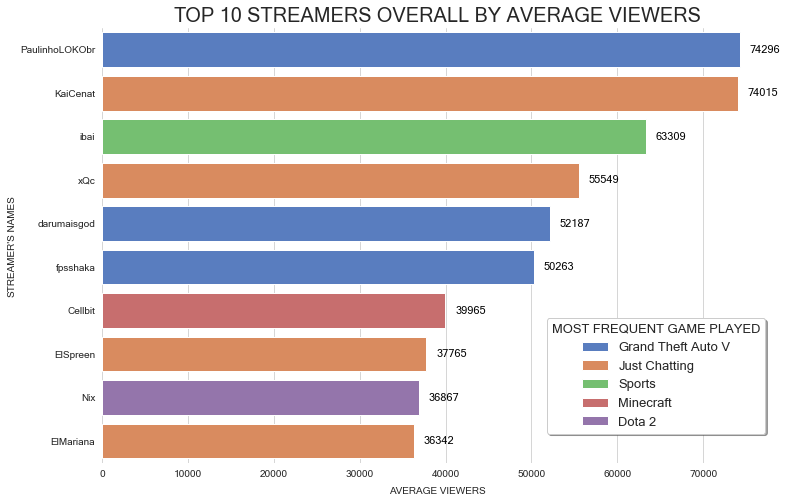

In [20]:
# manually separate individuals from organizations streams by checking it one at a time, from top to bottom until we have at least 10 names
organizations_list = ['kingsleague', 'dota2_paragon_ru', 'rivers_gg', 'pathofexile', 'Gamers8GG', 'LEC', 'ESLCS', 'BatalhaDaAldeia', 'LCS', 'LCK' , 'Gamers8GG_b']

top_10_individuals = streamers_df[streamers_df['STREAMER_NAMES'].isin(organizations_list) == False].head(10)
top_10_individuals = top_10_individuals.assign(STREAMER_NAMES=top_10_individuals['STREAMER_NAMES'].str.replace(r'[^a-zA-Z0-9]+', '')) # remove special characters from names like korean letters, etc.

#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12, 8))


ax = sns.barplot(data=top_10_individuals, x='VIEWS', y='STREAMER_NAMES', hue='MOST_FREQUENT_CATEGORY', palette='muted', dodge=False)

plt.xlabel('AVERAGE VIEWERS', fontweight="bold", labelpad=8)
plt.ylabel("STREAMER'S NAMES", fontweight="bold")

# Set the title to bold
plt.title('TOP 10 STREAMERS OVERALL BY AVERAGE VIEWERS', fontsize=20, fontweight="bold")
# Add the legend and set its title
legend = plt.legend(loc='center right', bbox_to_anchor=(1, 0.2), fancybox=True, shadow=True, ncol=1, prop={'size': 13})
legend.set_title('MOST FREQUENT GAME PLAYED', prop={'weight': 'bold', 'size': 13})
ax = create_annotation_text(ax)

### Answer:
In the top 10 overall, only male streamers are featured, with GTA and Just Chatting consistently being the most-watched games. Notably, PaulinhoLOKObr claims the top spot as the most-watched streamer with almost 75000 average viewers.

# Who are the 10 female streamers with the most average viewers and what do they play?

In [21]:
top_10_female_streamers = streamers_df[streamers_df['SEX'] == 'Female'].head(10)
top_10_female_streamers = top_10_female_streamers.assign(STREAMER_NAMES=top_10_female_streamers['STREAMER_NAMES'].str.replace(r'[^a-zA-Z0-9]+', ''))



C:\Users\Nicolas\AppData\Local\Temp\ipykernel_19380\1667047462.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  top_10_female_streamers = top_10_female_streamers.assign(STREAMER_NAMES=top_10_female_streamers['STREAMER_NAMES'].str.replace(r'[^a-zA-Z0-9]+', ''))


### Plot the graph

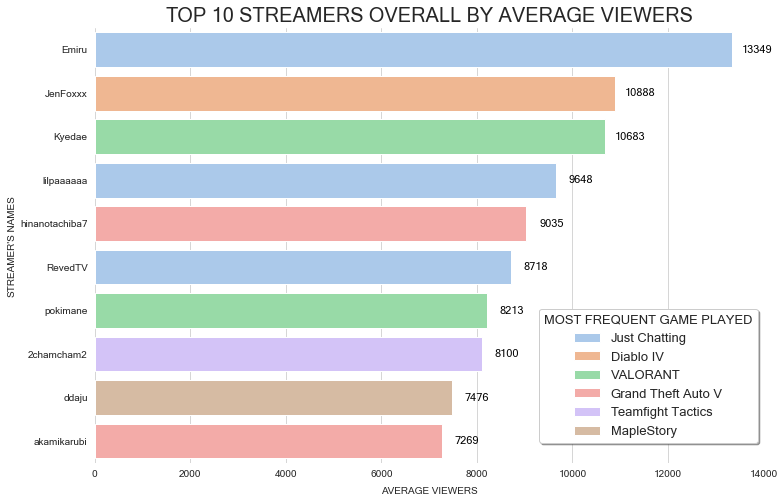

In [22]:
plt.figure(figsize=(12, 8))


ax = sns.barplot(data=top_10_female_streamers, x='VIEWS', y='STREAMER_NAMES', hue='MOST_FREQUENT_CATEGORY', palette='pastel', dodge=False)

plt.xlabel('AVERAGE VIEWERS', fontweight="bold", labelpad=8)
plt.ylabel("STREAMER'S NAMES", fontweight="bold")

# Set the title to bold
plt.title('TOP 10 STREAMERS OVERALL BY AVERAGE VIEWERS', fontsize=20, fontweight="bold")
# Add the legend and set its title
legend = plt.legend(loc='center right', bbox_to_anchor=(1, 0.2), fancybox=True, shadow=True, ncol=1, prop={'size': 13})
legend.set_title('MOST FREQUENT GAME PLAYED', prop={'weight': 'bold', 'size': 13})
ax = create_annotation_text(ax)

### Answer:
Unlike the overall rankings, Just Chatting maintains its top position, but GTA drops to the fourth spot among the most-watched games by female streamers. Notably, Emiru emerges as the most-watched female streamer, with an average of 13,000 viewers, despite having almost three times fewer viewers compared to the top 10 in the overall list.

# What is the gender proportion of the streamers?

### Plot the graph

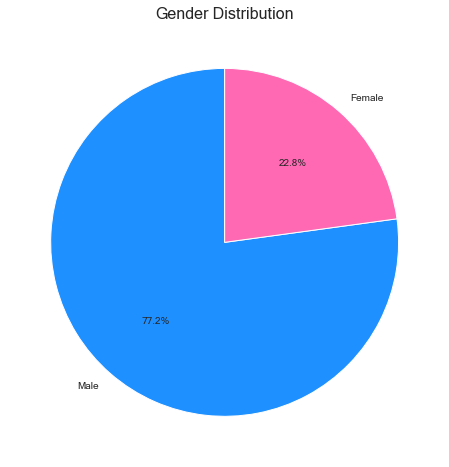

In [23]:
plt.figure(figsize=(12, 8))
# Count the number of males and females
gender_counts = streamers_df['SEX'].value_counts()

# Define the colors for each gender
gender_colors = ['hotpink' if gender == 'Female' else 'dodgerblue' for gender in gender_counts.index]

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=gender_colors, textprops={'weight': 'bold'})

# Add a title
plt.title('Gender Distribution', fontweight='bold', fontsize=16)
# Display the chart
plt.show()

### Answer:
77.2% of the streamers on the data gathered are male, while 22.8% are female.

# What is the Distribution of streamer's mean viewers by gender

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_19380\2134433626.py:22: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='SEX', y='VIEWS', data=filtered_df, jitter=True, linewidth=0.5, palette=strip_palette, marker='o', alpha=0.5)


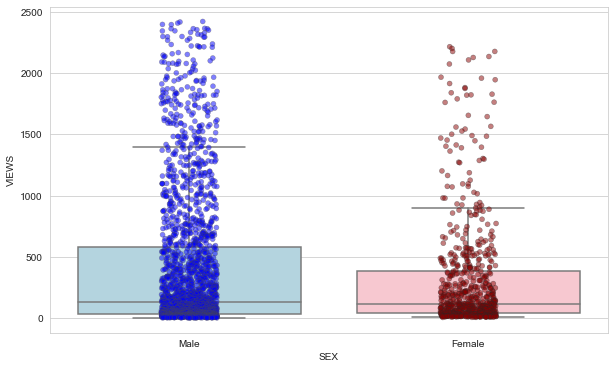

In [24]:
# palette of colors for the boxplot and the stripplot
box_palette = {"Male": "lightblue", "Female": "pink"}
strip_palette = {"Male": "blue", "Female": "darkred"}


# Calculate the IQR of the 'VIEWS' column
Q1 = streamers_df['VIEWS'].quantile(0.25)
Q3 = streamers_df['VIEWS'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to include only non-outliers
filtered_df = streamers_df[(streamers_df['VIEWS'] >= lower_bound) & (streamers_df['VIEWS'] <= upper_bound)]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='VIEWS', data=filtered_df, showfliers=False, palette=box_palette)
# Create the stripplot
sns.stripplot(x='SEX', y='VIEWS', data=filtered_df, jitter=True, linewidth=0.5, palette=strip_palette, marker='o', alpha=0.5)

plt.show()

### Answer:
In the boxplot, female streamers typically have a median viewership of 116, with an average of 308. This suggests a moderate appeal to viewers. The interquartile range (IQR) spans from 41.93 to 385.54, indicating that half of the female streamers fall within this viewership range. The standard deviation of 440.09 suggests a moderate level of variability.

For male streamers, the median viewership is higher at 129, with a slightly elevated mean of 412. The broader interquartile range, extending from 32.13 to 581.50, showcases a wider diversity in viewership levels. The standard deviation of 566.73 indicates a greater dispersion compared to females.

Visualized in a scatterplot, female streamers' data points are less concentrated than their male counterparts within the 500 to 2500 viewership range. Male streamers show a noticeable cluster of dots below others, while female data points are fewer and more scattered.


# Does longer time streaming result in more average viewers?

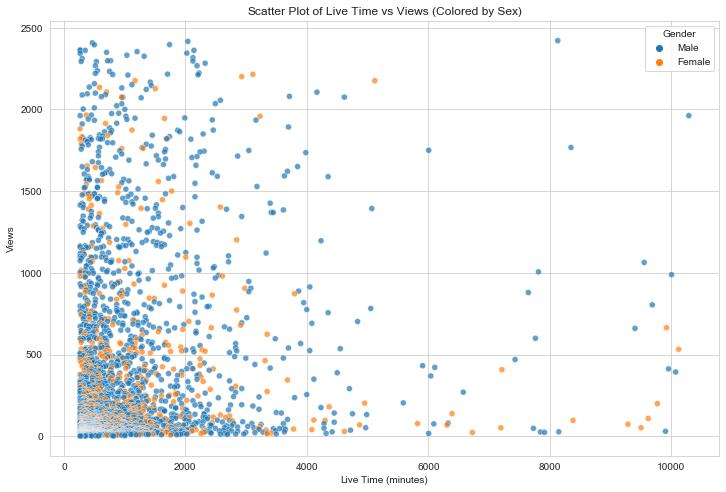

In [25]:
# we will be using filtered_df as it already removed the outliers

plt.figure(figsize=(12, 8))
sns.scatterplot(x='LIVE_TIME', y='VIEWS', hue='SEX', data=filtered_df, alpha=0.7)

# Set labels and title
plt.xlabel('Live Time (minutes)')
plt.ylabel('Views')
plt.title('Scatter Plot of Live Time vs Views (Colored by Sex)')
plt.legend(title='Gender')

### Answer:
Based on the scatterplot analysis, it is evident that higher average viewership tends to occur within the range of 0 to 2000 minutes of live streaming. Notably, there are outliers where streams with more than 1500 average viewers have accumulated over 6000 minutes of live streaming time.

# Do Viewership Patterns Differ Across Genders on Different Days of the Week?

### Group by date and views based on gender and create histplot

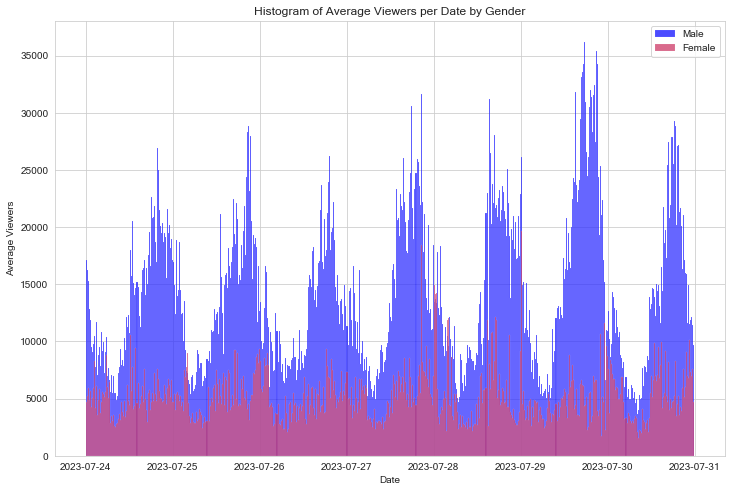

In [26]:
# filter and separate by gender
female_streamers = streamers_df[streamers_df['SEX'] == 'Female']
male_streamers = streamers_df[streamers_df['SEX'] == 'Male']

male = male_streamers.STREAMER_NAMES
female = female_streamers.STREAMER_NAMES

# as streamers_df does not have date column, we need to use the original streamers dataframe to get the date column
male_df = streamers[streamers['STREAMER_NAMES'].isin(male)]
female_df = streamers[streamers['STREAMER_NAMES'].isin(female)]

plt.figure(figsize=(12, 8))

v = male_df.groupby('DATE')['VIEWS'].mean().reset_index()
u = female_df.groupby('DATE')['VIEWS'].mean().reset_index()


# the dataframe has 3300 rows, so we need to use bins=600 to get a histogram with values more realistic to the data
sns.histplot(v, x='DATE', weights='VIEWS', bins=600, color='blue', alpha=0.7, label='Male')
sns.histplot(u, x='DATE', weights='VIEWS', bins=600, color='#c92b5b', alpha=0.7, label='Female')
plt.xlabel('Date')
plt.ylabel('Average Viewers')
plt.title('Histogram of Average Viewers per Date by Gender')
plt.legend()

### Answer:
The histogram indicates that there is no significant difference in average viewership between days 24 to 31, with a slight increase observed on Saturdays. However, to make more definitive conclusions, additional data would be necessary for a more comprehensive analysis.

# What is the Game Distribution Among Male and Female Streamers?

### Create dataframe with columns MOST_FREQUENT_CATEGORY, MALE and FEMALE

In [27]:
game_count_by_gender = streamers_df.groupby(['MOST_FREQUENT_CATEGORY', 'SEX']).size().unstack(fill_value=0).reset_index()
# create column total to sort the values and get only the top 20 as there is too much games
game_count_by_gender['total'] = game_count_by_gender['Female'] + game_count_by_gender['Male']
top30_game_count_by_gender = game_count_by_gender.sort_values(by='total', ascending=False).head(30)

### Plot the graph

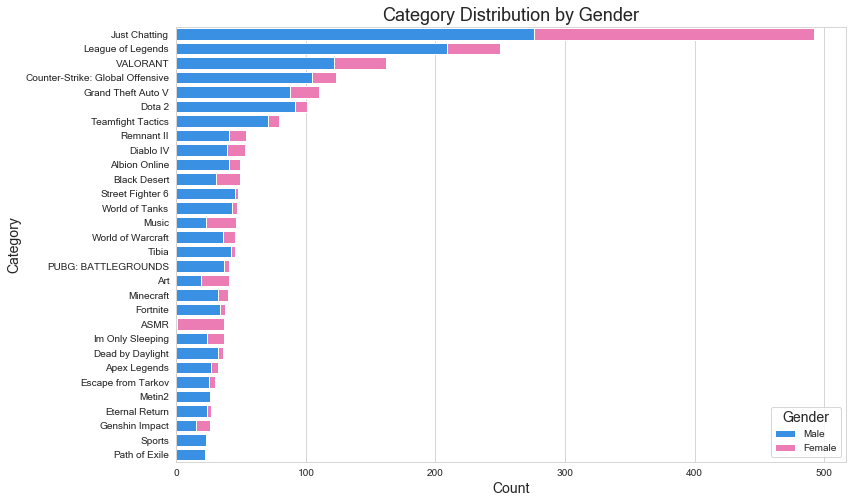

In [28]:
plt.figure(figsize=(12, 8))
plt.title('Category Distribution by Gender', fontsize=18, fontweight='bold')

# Create the stacked bar plot
sns.barplot(data=top30_game_count_by_gender, y='MOST_FREQUENT_CATEGORY', x='Male', color='dodgerblue', label='Male')
sns.barplot(data=top30_game_count_by_gender, y='MOST_FREQUENT_CATEGORY', x='Female', color='hotpink', label='Female', left=top30_game_count_by_gender['Male'])

plt.ylabel('Category', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=14, fontweight='bold')

# Display the legend
plt.legend(loc='lower right', title='Gender', title_fontsize=14)

### Answer:
The bar plot illustrates that games such as League of Legends, VALORANT, CSGO, GTA, Dota 2, TFT, etc., are more commonly streamed by males. On the other hand, genres like music, art, and ASMR are more predominant among female streamers. Notably, Just Chatting is a category where both genders have a nearly equal number of streamers.

# What is the Genre distribution by Gender?

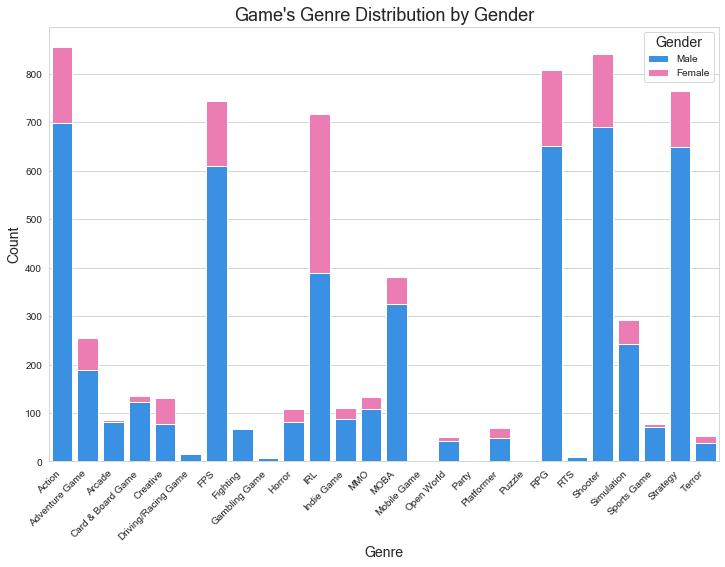

In [29]:
streamers_categories = streamers_df.merge(categories, how='left', left_on='MOST_FREQUENT_CATEGORY', right_on='GAME_NAME')
streamers_categories.dropna(inplace=True)

category_count_by_gender = streamers_categories.groupby(['CATEGORY', 'SEX']).size().unstack(fill_value=0).reset_index()

plt.figure(figsize=(12, 8))
plt.title("Game's Genre Distribution by Gender", fontsize=18, fontweight='bold')

# Create the stacked bar plot
sns.barplot(data=category_count_by_gender, x='CATEGORY', y='Male', color='dodgerblue', label='Male')
sns.barplot(data=category_count_by_gender, x='CATEGORY', y='Female', color='hotpink', label='Female', bottom=category_count_by_gender['Male'])

plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Display the legend
plt.legend(loc='upper right', title='Gender', title_fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show; # this is needed to avoid the text output of the function

### Answer:
The column plot highlights a predominant presence of males in all genres, with IRL being the most balanced genre in terms of gender representation. Genres such as FPS, Action, RPG, Shooter, and Strategy also exhibit a relatively better gender variety distribution, although not as close as observed in IRL.

# What is the language distribution?

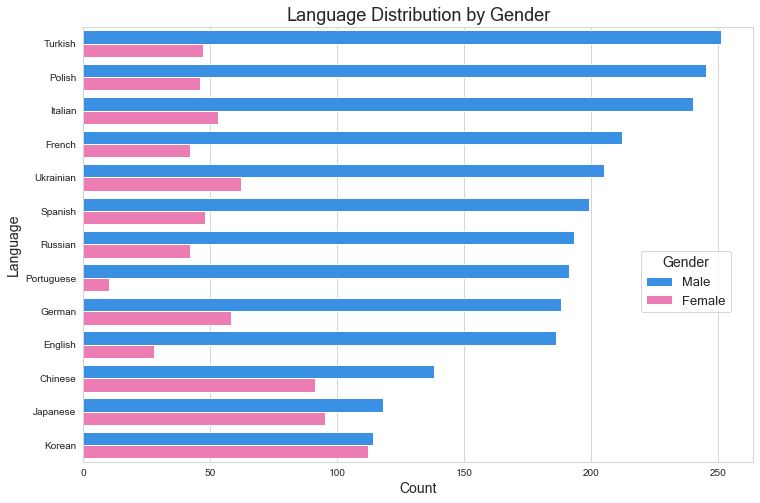

In [30]:
# Male streamers language count
male_streamers_lang_count = male_streamers['LANG'].value_counts().reset_index()
male_streamers_lang_count = male_streamers_lang_count.rename(columns={'index': 'Language', 'LANG': 'Count'})
# Create a gender column to the graph
male_streamers_lang_count['Gender'] = 'Male'

# Female streamers language count
female_streamers_lang_count = female_streamers['LANG'].value_counts().reset_index()
female_streamers_lang_count = female_streamers_lang_count.rename(columns={'index': 'Language', 'LANG': 'Count'})
# Create a gender column to the graph
female_streamers_lang_count['Gender'] = 'Female'

# Concat the data for both genders
streamers_lang_count_combined_data = pd.concat([male_streamers_lang_count, female_streamers_lang_count])

plt.figure(figsize=(12, 8))
plt.title('Language Distribution by Gender', fontsize=18, fontweight='bold', fontstyle='italic')

# Create the stacked bar plot
ax = sns.barplot(data=streamers_lang_count_combined_data, x='Count', y='Language', hue='Gender', palette=['dodgerblue', 'hotpink'], dodge=True)

plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Language', fontsize=14, fontweight='bold')

# Display the legend
plt.legend(loc='upper right', title='Gender', title_fontsize=14)

ax.legend(loc='upper center', bbox_to_anchor=(0.9, 0.5), title='Gender', title_fontsize=14, ncol=1, prop={'size': 13})

# Display the legend
#plt.legend(loc='upper right', title='Gender', title_fontsize=14)

#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

### Answer:
Surprisingly, Turkish emerges as the language with the highest number of streamers overall in the dataset, totaling 298. Italian follows closely in second place with 293, and Polish ranks third with 291. Portuguese is the last among the top languages with 201 streamers. Additionally, as mentioned earlier, Chinese, Japanese, and Korean exhibit a notable gender distribution and are the most balanced among the languages.

# The most popular games for each language:

In [31]:
game_by_language = streamers_df.groupby(['LANG', 'MOST_FREQUENT_CATEGORY'])['VIEWS'].mean().reset_index().sort_values(by='VIEWS', ascending=False)
most_popular_game_by_language = game_by_language.loc[game_by_language.groupby('LANG')['VIEWS'].idxmax()]
most_popular_game_by_language.columns = ['LANGUAGE', 'MOST POPULAR GAME', 'AVERAGE VIEWERS'] # rename the columns
most_popular_game_by_language['AVERAGE VIEWERS'] = most_popular_game_by_language['AVERAGE VIEWERS'].apply(lambda x: f'{x:,.0f}') # format the numbers to have commas

In [32]:
most_popular_game_by_language

,LANGUAGE,MOST POPULAR GAME,AVERAGE VIEWERS
41,Chinese,Punch Club 2: Fast Forward,"4,171"
114,English,Path of Exile,"20,735"
207,French,Sons of the Forest,"31,925"
252,German,FIFA 23,"4,297"
357,Italian,MAD WAY,"1,204"
450,Japanese,Punch Club 2: Fast Forward,"13,309"
487,Korean,Everybody 1-2-Switch,"12,759"
519,Polish,60 Seconds!,"3,614"
619,Portuguese,Grand Theft Auto V,"12,939"
664,Russian,FIFA 23,"6,644"


### Plot the Graph

In [33]:
import plotly.graph_objects as go

font_size = 16
row_gap = 30
header_color = '#B8A5E5' # purple
even_row_color = 'lightgrey' # light grey
language_names_color = '#ACC9DB' # light blue
odd_row_color = '#DEB3B2' # light red
text_color = 'black' # black

fig = go.Figure(data=[go.Table(
    header=dict(values=most_popular_game_by_language.columns, font=dict(size=font_size), fill_color=header_color),
    cells=dict(values=[most_popular_game_by_language[col] for col in most_popular_game_by_language.columns],
               font=dict(size=font_size, color=text_color),
               fill=dict(color=[language_names_color] + [even_row_color, odd_row_color] * ((len(most_popular_game_by_language) + 1) // 2)),
               height=row_gap))])
fig.update_layout(width=1200, height=600, autosize=False)
fig.show()

![Most Popular Genres Plot](data-cleaning/visualizations/most_popular_games_by_language.png)

# The most popular genres for each language:

In [34]:
# merge streamers_df with categories dataframe to get the genre column
streamers_df_with_genre_column = streamers_df.merge(categories, how='left', left_on='MOST_FREQUENT_CATEGORY', right_on='GAME_NAME')
streamers_df_with_genre_column.drop(columns=['MOST_FREQUENT_CATEGORY'], inplace=True)

# group by language and genre and get the average views, so we can create a table with the most popular genre by language
genre_by_language = streamers_df_with_genre_column.groupby(['LANG', 'CATEGORY'])['VIEWS'].mean().reset_index().sort_values(by='VIEWS', ascending=False)
most_popular_genre_by_language = genre_by_language.loc[genre_by_language.groupby('LANG')['VIEWS'].idxmax()]
most_popular_genre_by_language['VIEWS'] = most_popular_genre_by_language['VIEWS'].apply(lambda x: f'{x:,.0f}') # convert float to int
most_popular_genre_by_language.columns = ['LANGUAGE', 'MOST POPULAR GENRE', 'AVERAGE VIEWERS']

### Plot the graph

In [35]:
font_size = 16
row_gap = 30
header_color = '#B8A5E5' # purple
even_row_color = 'lightgrey' # light grey
language_names_color = '#75DCC2' # light green
odd_row_color = '#E6D0BC' # light orange
text_color = 'black' # black

fig = go.Figure(data=[go.Table(
    header=dict(values=most_popular_genre_by_language.columns, font=dict(size=font_size), fill_color=header_color),
    cells=dict(values=[most_popular_genre_by_language[col] for col in most_popular_genre_by_language.columns],
               font=dict(size=font_size, color=text_color),
               fill=dict(color=[language_names_color] + [even_row_color, odd_row_color] * ((len(most_popular_genre_by_language) + 1) // 2)),
               height=row_gap))])
fig.update_layout(width=1200, height=600, autosize=False)
fig.show()

![Most Popular Genres Plot](data-cleaning/visualizations/most_popular_genres_by_language.png)


# What is the female proportion to male by each language?

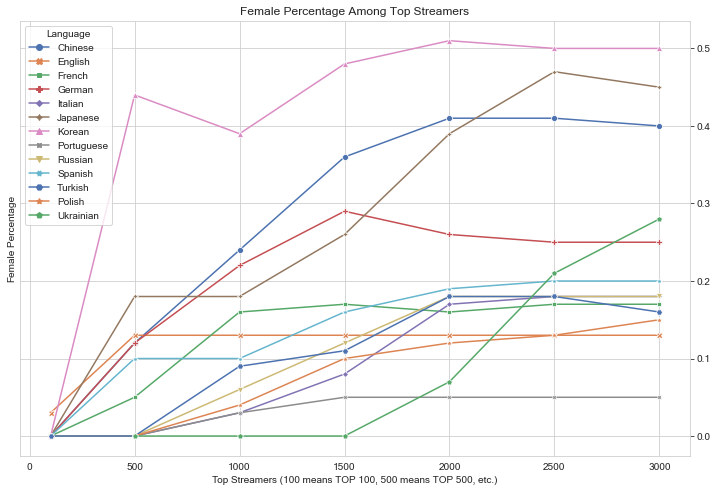

In [36]:
tops = [100, 500, 1000, 1500, 2000, 2500, 3000]

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Top', 'LANG', 'Female_Percentage'])

for top in tops:
    top_df = streamers_df.head(top)
    
    # Group by 'LANG' and calculate female percentage
    gender_counts_by_lang = top_df.groupby('LANG')['SEX'].value_counts().unstack(fill_value=0)
    gender_counts_by_lang['Female_Percentage'] = round(gender_counts_by_lang['Female'] / (gender_counts_by_lang['Male'] + gender_counts_by_lang['Female']), 2)
    gender_counts_by_lang = gender_counts_by_lang.reset_index()
    
    # Add the 'Top' column to the DataFrame
    gender_counts_by_lang['Top'] = top
    
    # Append the results to the overall DataFrame
    result_df = pd.concat([result_df, gender_counts_by_lang[['Top', 'LANG', 'Female_Percentage']]])


plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='Top', y='Female_Percentage', hue='LANG', style='LANG', markers=True, dashes=False, palette="deep", data=result_df, marker='o')
plt.xlabel('Top Streamers (100 means TOP 100, 500 means TOP 500, etc.)',)
plt.ylabel('Female Percentage')
plt.legend(title='Language')
plt.title('Female Percentage Among Top Streamers')
ax.yaxis.tick_right() # move y axis to the right



### Answer:
In the top 100 streamers, only one female is observed among English speakers, and none from other languages. However, as the number of streamers increases, Asian countries stand out; with Korean, Japanese, and Chinese streams showing a female percentage of more than 40% in the top 3000 streamers. Specifically, Japanese stands out as the most favorable language for female streamers, consistently maintaining over 40% representation across various ranking bins (top 500, top 1000, etc).


# **Overall Findings**


Twitch data analysis reveals that "Just Chatting" dominates with 59% more average viewers than the second-ranked game, GTA V. Notable findings include a surge in sports viewership on weekends and Path of Exile's strategic weekday events boosting its average viewership by 75%. "Just Chatting" consistently maintains dominance across all hours, and IRL claims the top genre spot. Among streamers, males dominate the top 10, with "Just Chatting" and GTA as consistent favorites. Noteworthy is the shift in female streamers' game preferences, with Emiru emerging as the most-watched. Gender distribution shows 77.2% male streamers, with a moderate appeal for females. The analysis suggests that higher average viewership occurs within 0-2000 minutes of streaming, and Turkish emerges as the top language with 298 streamers. Japanese stands out as the most favorable language for female streamers, maintaining over 40% representation across various ranking bins.

In [37]:
#!jupyter nbconvert --to html --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True testparahtml.ipynb --output testparahtml_output.html --TemplateExporter.template_path=['.']

!jupyter nbconvert --to html twitch_data_analysis.ipynb

#!jupyter nbconvert --to html --template custom.tpl testparahtml.ipynb

[NbConvertApp] Converting notebook twitch_data_analysis.ipynb to html
C:\Users\Nicolas\Desktop\TESTE VIRTUAL\venv\share\jupyter\nbconvert\templates\base\display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] WARNING | Alternative text is missing on 15 image(s).
[NbConvertApp] Writing 1727963 bytes to twitch_data_analysis.html
